Time series based on processed data on ECCO grids [all detrending should be done on individual grid first before generating the time series]:<br>
1.	rms as function of time for ECCOv4r5, GRACE and ECCOv4r5-GRACE (we can do ECCO for its full period, which extends back to 1992)<br>
2.	rms as function of time for ECCOv4r5, ECCOctrl, and ECCOv4r5-ECCOctrl<br>
    2.1 nothing removed<br>
    2.2 trends removed<br>
    2.3 trends and mean season removed<br>
3.	rms as function of time for GRACE and detrended GRACE<br>
4.	rms(GRACE-ECCOv4r5) and rms(GRACE-ECCOctrl)<br>
    4.1 nothing removed<br>
    4.2 trends removed<br>
    4.3 trends and mean season removed<br>
5.	rms of ECCOv4r5 and ECCOctrl and (ECCOv4r5-ECCOctrl) on time steps where GRACE data are NOT available<br>
    5.1 nothing removed<br>
    5.2 trends removed<br>
    5.3 trends and mean season removed<br>
6.	rms of ECCOv4r5 and ECCOctrl and (ECCOv4r5-ECCOctrl) on time steps where GRACE data are available<br>
    6.1 nothing removed<br>
    6.2 trends removed<br>
    6.3 trends and mean season removed<br>
[maybe make 5.1 and 6.1 in the same plot; 5.2 and 6.2; 5.3 and 6.3]

In [1]:
# Imports

import os
from tqdm.auto import tqdm # progress bar
import xarray as xr

import warnings
warnings.filterwarnings("ignore")

# Used to reload another notebook if code was updated
from importlib import reload

from ipynb.fs.full import ECCO_time_sets
from ipynb.fs.full import Filter
from ipynb.fs.full import RMS
from ipynb.fs.full import Plots
from ipynb.fs.full import Utils

from config import input_dir

/glade/work/mengnanz/conda-envs/ecco_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt

In [3]:
# Open data sets

aligned_grace = xr.open_dataset(os.path.join(input_dir, 'aligned_grace.nc'))
aligned_ecco = xr.open_dataset(os.path.join(input_dir, 'aligned_ecco.nc'))
early_ecco = xr.open_dataset(os.path.join(input_dir, 'ecco_199201-201912-rm-means.nc'))
all_ecco = xr.open_dataset(os.path.join(input_dir, 'pb_ECCO_all_data.nc'))
late_ecco = xr.open_dataset(os.path.join(input_dir, 'ecco_202001-202402-rm-means.nc'))

raw_ecco = xr.open_dataset(os.path.join(input_dir, 'ecco_199201-201912-raw.nc'))
raw_ecco_rm_glob = xr.open_dataset(os.path.join(input_dir, 'ecco-global-mean-rmved.nc')) 
raw_ecco_rm_means = xr.open_dataset(os.path.join(input_dir, 'ecco_199201-201912-rm-means.nc')) 

ecco_grid = xr.open_dataset('/glade/u/home/mengnanz/p2375_bp_seasonal_cycle/input_dir/ECCOllc90/r5_nctiles_grid/ECCO-GRID.nc')
ecco_1992_2020 = xr.open_dataset(os.path.join(input_dir, 'ecco_199201-201912-rm-means.nc'))
ecco_ctrl = xr.open_dataset(os.path.join(input_dir, 'pb_ECCO_ctrl.nc'))

weight = xr.open_dataset(os.path.join(input_dir, 'ecco_early_weight.nc'))

1.	rms as function of time for ECCOv4r5, GRACE and ECCOv4r5-GRACE (we can do ECCO for its full period, which extends back to 1992)

1.1 nothing removed

In [4]:
# remove time-mean from data
ecco_demean = aligned_ecco - aligned_ecco.mean(dim='time')
grace_demean = aligned_grace - aligned_grace.mean(dim='time')

In [67]:
grace_rms_time = RMS.rms_time(grace_demean, 'grace', weight)
ecco_rms_time = RMS.rms_time(ecco_demean, 'ecco', weight)
rms_diff_time = RMS.rms_time(grace_demean - ecco_demean, 'diff', weight)

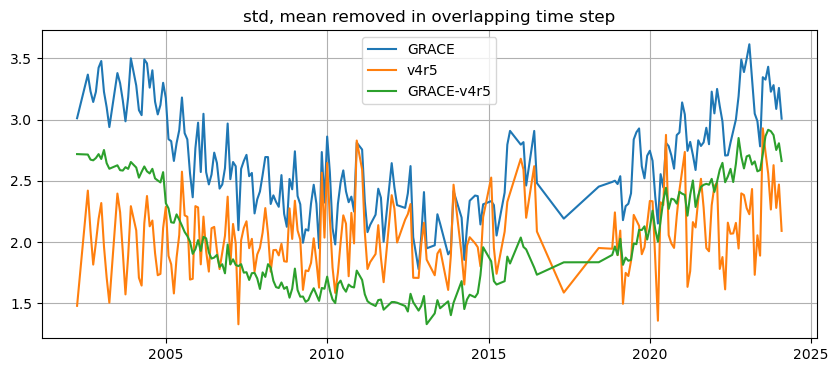

In [68]:
plt.figure(figsize=(10,4))
plt.plot(aligned_grace.time,grace_rms_time.pb,label='GRACE')
plt.plot(aligned_ecco.time,ecco_rms_time.pb,label='v4r5')
plt.plot(aligned_grace.time,rms_diff_time.pb,label='GRACE-v4r5')
plt.title('std, mean removed in overlapping time step')
plt.grid()
plt.legend()

In [36]:
# grace_rms_time = RMS.rms_time(aligned_grace, 'grace', weight)
# ecco_rms_time = RMS.rms_time(aligned_ecco, 'ecco', weight)
# rms_diff_time = RMS.rms_time(aligned_grace - aligned_ecco, 'diff', weight)

In [ ]:
# fig0 = RMS.rms_multi_time_plots([aligned_grace, all_ecco, aligned_grace-aligned_ecco], \
#                          weight, \
#                          ['grace', 'ecco', 'grace-ecco'], \
#                          ['RMS of GRACE, ECCO, and GRACE-ECCO at GRACE Times and Resolution', '', ''])

# fig1 = Plots.plot_time(grace_rms_time, 'GRACE')
# fig1.savefig(os.path.join(input_dir, 'grace-over-time.png'))
# fig2 = Plots.plot_time(ecco_rms_time, 'ECCO')
# fig2.savefig(os.path.join(input_dir, 'ecco-only-times-that-align-with-grace.png'))
# fig3 = Plots.plot_time(rms_diff_time, 'Difference')
# fig3.savefig(os.path.join(input_dir, 'diff-over-time.png'))

# all_ecco_rms_time = RMS.rms_time(all_ecco, 'ecco-1992-2020', weight)
# fig4 = Plots.plot_time(all_ecco_rms_time, 'All ECCO v4r5')
# fig4.savefig(os.path.join(input_dir, 'ecco-all-v4r5-rms-over-time.png'))

# Plots.save_figures_to_pdf([fig0, fig1, fig2, fig3, fig4], 'rms_grace_eccov4r5_time')

In [5]:
# 1.2 Trends Removed
grace_detrended = Filter.detrend(aligned_grace)
ecco_detrended = Filter.detrend(aligned_ecco)
diff_detrended = Filter.detrend(aligned_ecco-aligned_grace)

In [6]:
grace_rms_time_detrend = RMS.rms_time(grace_detrended, 'grace', weight)
ecco_rms_time_detrend = RMS.rms_time(ecco_detrended, 'ecco', weight)
rms_diff_time_detrend = RMS.rms_time(grace_detrended - ecco_detrended, 'diff', weight)

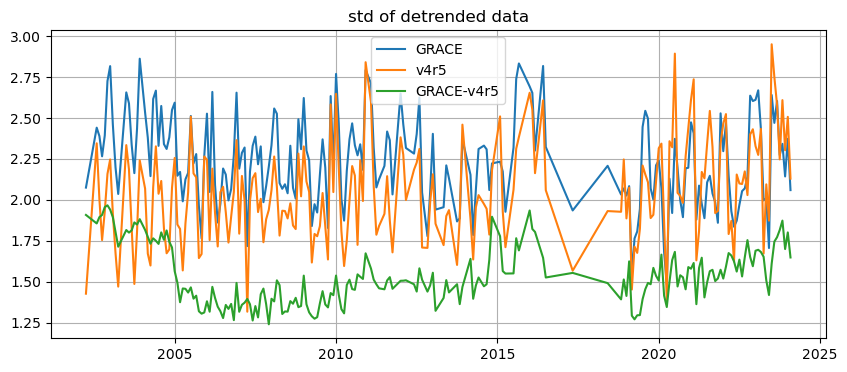

In [7]:
plt.figure(figsize=(10,4))
plt.plot(aligned_grace.time,grace_rms_time_detrend.pb,label='GRACE')
plt.plot(aligned_ecco.time,ecco_rms_time_detrend.pb,label='v4r5')
plt.plot(aligned_grace.time,rms_diff_time_detrend.pb,label='GRACE-v4r5')
plt.title('std of detrended data')
plt.grid()
plt.legend()

In [ ]:
# print(grace_detrended)
# fig01 = RMS.rms_multi_time_plots([grace_detrended, ecco_detrended, diff_detrended], \
#                          weight, \
#                          ['grace', 'ecco', 'grace-ecco'], \
#                          ['RMS of GRACE, ECCO, and GRACE-ECCO, Remove Trends'])



In [60]:
# 1.3 Trends & MSC Removed
reload(Filter)
grace_detrended_msc = Filter.remove_msc(grace_detrended)
ecco_detrended_msc = Filter.remove_msc(ecco_detrended)
diff_detrended_msc = Filter.remove_msc(diff_detrended)

2025-01-06 14:55:12 Getting mean season cycle for each data point...
2025-01-06 14:55:21 Done getting mean season cycle for each data point.
2025-01-06 14:55:22 Getting mean season cycle for each data point...
2025-01-06 14:55:30 Done getting mean season cycle for each data point.
2025-01-06 14:55:31 Getting mean season cycle for each data point...
2025-01-06 14:55:40 Done getting mean season cycle for each data point.


2025-01-02 12:08:08 Done getting mean season cycle for each data point.


2025-01-02 12:08:09 Getting mean season cycle for each data point...


2025-01-02 12:08:22 Done getting mean season cycle for each data point.


In [61]:
grace_rms_time_detrend_dess = RMS.rms_time(grace_detrended_msc, 'grace', weight)
ecco_rms_time_detrend_dess = RMS.rms_time(ecco_detrended_msc, 'ecco', weight)
rms_diff_time_detrend_dess = RMS.rms_time(grace_detrended_msc - ecco_detrended_msc, 'diff', weight)

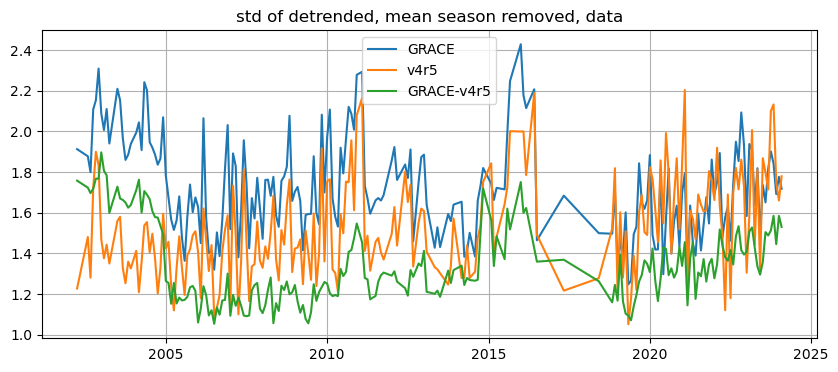

In [62]:
plt.figure(figsize=(10,4))
plt.plot(aligned_grace.time,grace_rms_time_detrend_dess.pb,label='GRACE')
plt.plot(aligned_ecco.time,ecco_rms_time_detrend_dess.pb,label='v4r5')
plt.plot(aligned_grace.time,rms_diff_time_detrend_dess.pb,label='GRACE-v4r5')
plt.title('std of detrended, mean season removed, data')
plt.grid()
plt.legend()

In [ ]:
# fig02 = RMS.rms_multi_time_plots([grace_detrended_msc, ecco_detrended_msc, diff_detrended_msc], \
#                          weight, \
#                          ['grace', 'ecco', 'grace-ecco'], \
#                          ['RMS of GRACE, ECCO, and GRACE-ECCO, Remove Trends and MSC', '', ''])

# Plots.save_figures_to_pdf([fig0, fig01, fig02], 'rms_grace_eccov4r5_3_sets_of_3')

2.	rms as function of time for ECCOv4r5, ECCOctrl, and ECCOv4r5-ECCOctrl<br>
    2.1 nothing removed<br>
    2.2 trends removed<br>
    2.3 trends and mean season removed<br>

In [86]:
# 2.1 nothing removed
[v4r5, ctrl, diff] = Utils.get_aligned_data(all_ecco, ecco_ctrl)
v4r5_demean = v4r5 - v4r5.mean(dim='time')
ctrl_demean = ctrl - ctrl.mean(dim='time')
diff = v4r5_demean - ctrl_demean

v4r5_rms_time = RMS.rms_time(v4r5_demean, 'ecco', weight)
ctrl_rms_time = RMS.rms_time(ctrl_demean, 'ecco', weight)
rms_diff_time = RMS.rms_time(diff, 'diff', weight)

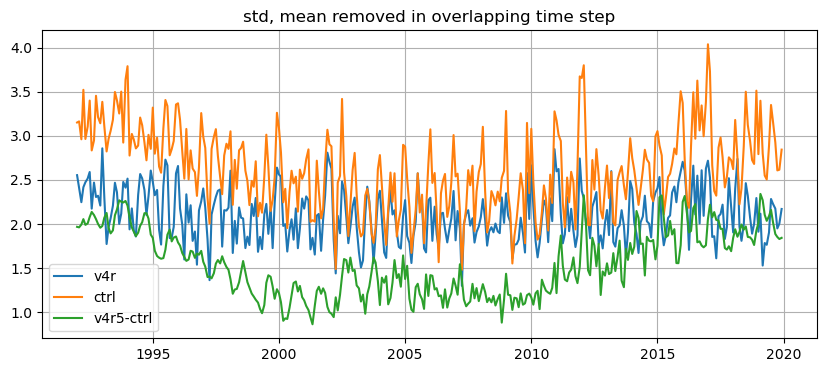

In [87]:
plt.figure(figsize=(10,4))
plt.plot(v4r5_demean.time,v4r5_rms_time.pb,label='v4r')
plt.plot(v4r5_demean.time,ctrl_rms_time.pb,label='ctrl')
plt.plot(v4r5_demean.time,rms_diff_time.pb,label='v4r5-ctrl')
plt.title('std, mean removed in overlapping time step')
plt.grid()
plt.legend()

In [90]:
# 2.2 remove trend
[v4r5, ctrl, diff] = Utils.get_aligned_data(all_ecco, ecco_ctrl)
v4r5_detrend = Filter.detrend(v4r5)
ctrl_detrend = Filter.detrend(ctrl)

v4r5_detrend_rms_time = RMS.rms_time(v4r5_detrend, 'ecco', weight)
ctrl_detrend_rms_time = RMS.rms_time(ctrl_detrend, 'ecco', weight)
rms_diff_detrend_time = RMS.rms_time(v4r5_detrend-ctrl_detrend, 'diff', weight)


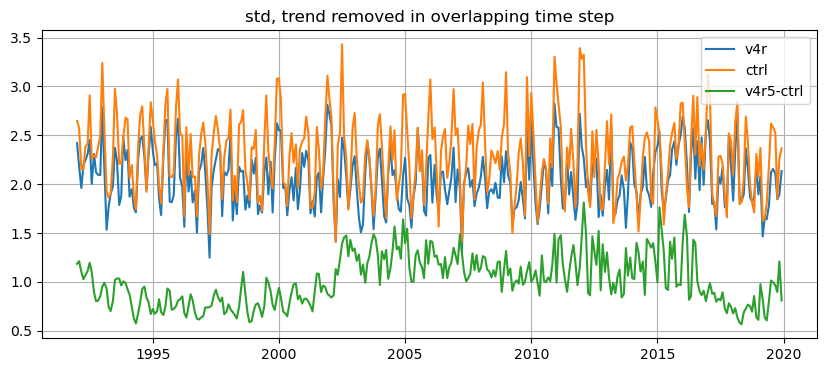

In [91]:
plt.figure(figsize=(10,4))
plt.plot(v4r5_demean.time,v4r5_detrend_rms_time.pb,label='v4r')
plt.plot(v4r5_demean.time,ctrl_detrend_rms_time.pb,label='ctrl')
plt.plot(v4r5_demean.time,rms_diff_detrend_time.pb,label='v4r5-ctrl')
plt.title('std, trend removed in overlapping time step')
plt.grid()
plt.legend()

In [92]:
v4r5_detrended_msc = Filter.remove_msc(v4r5_detrend)
ctrl_detrended_msc = Filter.remove_msc(ctrl_detrend)

v4r5_detrend_msc_rms_time = RMS.rms_time(v4r5_detrended_msc, 'ecco', weight)
ctrl_detrend_msc_rms_time = RMS.rms_time(ctrl_detrended_msc, 'ecco', weight)
rms_diff_detrend_msc_time = RMS.rms_time(v4r5_detrended_msc-ctrl_detrended_msc, 'diff', weight)


2025-01-07 12:03:37 Getting mean season cycle for each data point...
2025-01-07 12:03:46 Done getting mean season cycle for each data point.
2025-01-07 12:03:47 Getting mean season cycle for each data point...
2025-01-07 12:03:59 Done getting mean season cycle for each data point.


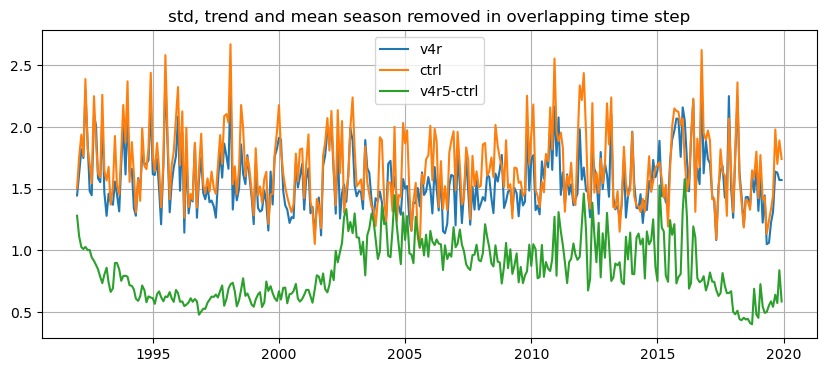

In [93]:
plt.figure(figsize=(10,4))
plt.plot(v4r5_demean.time,v4r5_detrend_msc_rms_time.pb,label='v4r')
plt.plot(v4r5_demean.time,ctrl_detrend_msc_rms_time.pb,label='ctrl')
plt.plot(v4r5_demean.time,rms_diff_detrend_msc_time.pb,label='v4r5-ctrl')
plt.title('std, trend and mean season removed in overlapping time step')
plt.grid()
plt.legend()

In [ ]:

# [v4r5, ctrl, diff] = Utils.get_aligned_data(all_ecco, ecco_ctrl)

# fig0 = RMS.rms_multi_time_plots([v4r5, ctrl, diff], \
#                          weight, \
#                          ['v4r5', 'ecco', 'grace-ecco'], \
#                          ['RMS of v4r5, ECCO, and GRACE-ECCO at GRACE Times and Resolution'])

# v4r5_detrended = Filter.detrend(v4r5)
# ctrl_detrended = Filter.detrend(ctrl)
# diff_detrended = Filter.detrend(diff)

# fig01 = RMS.rms_multi_time_plots([v4r5_detrended, ctrl_detrended, diff_detrended], \
#                          weight, \
#                          ['v4r5_detrended', 'ctrl_detrended', 'diff_detrended'], \
#                          ['RMS of ECCO V4R5, CTRL, and V4R5-CTRL, Detrended'])

# v4r5_detrended_msc = Filter.remove_msc(v4r5_detrended)
# ctrl_detrended_msc = Filter.remove_msc(ctrl_detrended)
# diff_detrended_msc = Filter.remove_msc(diff_detrended)

# fig02 = RMS.rms_multi_time_plots([v4r5_detrended_msc, ctrl_detrended_msc, diff_detrended_msc], \
#                          weight, \
#                          ['v4r5_detrended_msc', 'ctrl_detrended_msc', 'diff_detrended_msc'], \
#                          ['RMS of ECCO V4R5, CTRL, and V4R5-CTRL, Detrended and MSC Removed'])

# Plots.save_figures_to_pdf([fig0, fig01, fig02], 'rms_eccov4r5_ctrl_3_sets_of_3')

3.	rms as function of time for GRACE and detrended GRACE<br>

In [94]:
grace_demean = aligned_grace - aligned_grace.mean(dim='time')
grace_detrended = Filter.detrend(aligned_grace)

grace_rms_time_trends_on = RMS.rms_time(grace_demean, 'grace', weight)
grace_rms_time_trends_off = RMS.rms_time(grace_detrended, 'grace', weight)


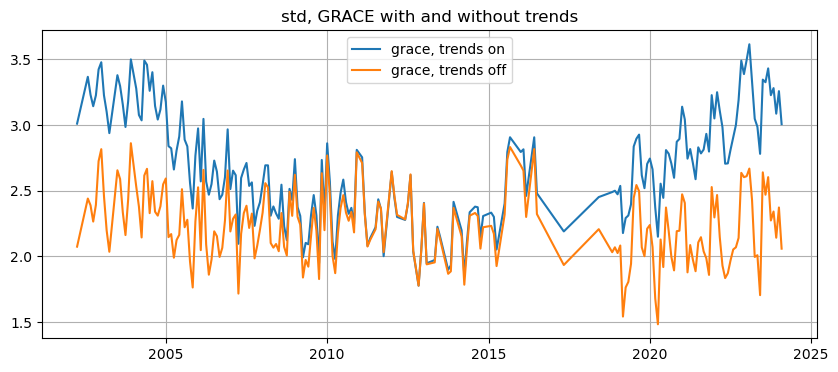

In [96]:
plt.figure(figsize=(10,4))
plt.plot(grace_demean.time,grace_rms_time_trends_on.pb,label='grace, trends on')
plt.plot(grace_demean.time,grace_rms_time_trends_off.pb,label='grace, trends off')
plt.title('std, GRACE with and without trends')
plt.grid()
plt.legend()

4.	rms(GRACE-ECCOv4r5) and rms(GRACE-ECCOctrl)<br>
    4.1 nothing removed<br>
    4.2 trends removed<br>
    4.3 trends and mean season removed<br>

In [99]:
grace_m_v4r5 = aligned_grace - aligned_ecco
grace_m_v4r5_rms = RMS.rms_time(grace_m_v4r5, 'grace', weight)

[grace, ctrl, grace_m_ctrl] = Utils.get_aligned_data(aligned_grace, ecco_ctrl)
grace_m_ctrl_rms = RMS.rms_time(grace_m_ctrl, 'grace', weight)

# fig0 = RMS.rms_multi_time_plots([grace_m_v4r5, grace_m_ctrl], \
#                          weight, \
#                          ['grace-v4r5', 'grace-ctrl'], \
#                          ['RMS of GRACE-ECCOv4r5 and GRACE-ECCOctrl'])

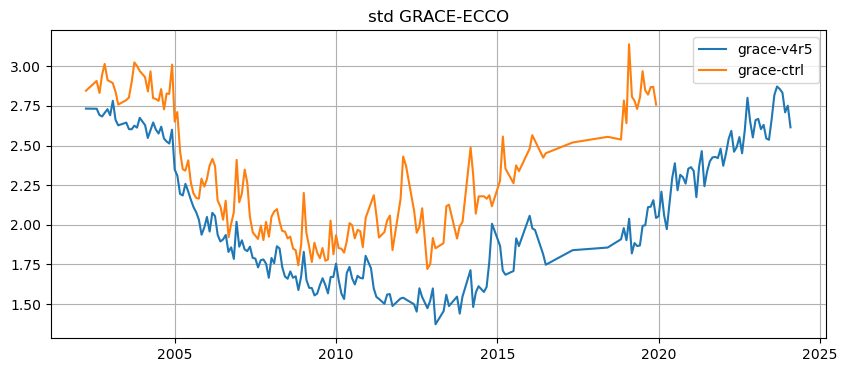

In [101]:
plt.figure(figsize=(10,4))
plt.plot(grace_m_v4r5.time,grace_m_v4r5_rms.pb,label='grace-v4r5')
plt.plot(grace_m_ctrl.time,grace_m_ctrl_rms.pb,label='grace-ctrl')
plt.title('std GRACE-ECCO')
plt.grid()
plt.legend()

In [102]:
grace_m_v4r5_detrended = Filter.detrend(grace_m_v4r5)
grace_m_v4r5_rms = RMS.rms_time(grace_m_v4r5_detrended, 'grace', weight)

grace_m_ctrl_detrended = Filter.detrend(grace_m_ctrl)
grace_m_ctrl_rms = RMS.rms_time(grace_m_ctrl_detrended, 'grace', weight)

# fig01 = RMS.rms_multi_time_plots([grace_m_v4r5_detrended, grace_m_ctrl_detrended], \
#                          weight, \
#                          ['grace-v4r5', 'grace-ctrl'], \
#                          ['RMS of GRACE-ECCOv4r5 and GRACE-ECCOctrl, Detrended'])

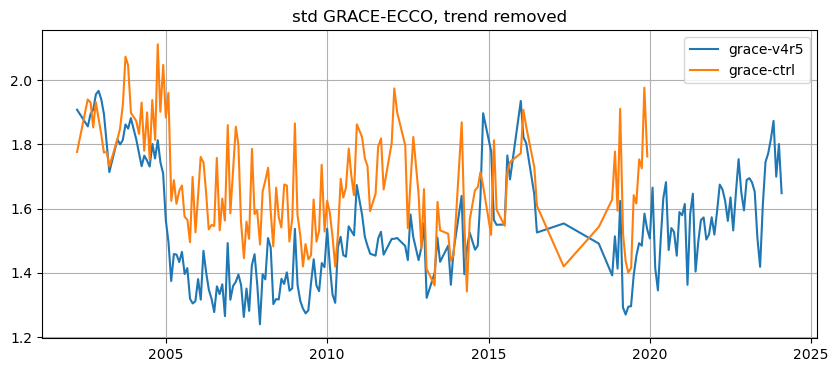

In [103]:
plt.figure(figsize=(10,4))
plt.plot(grace_m_v4r5.time,grace_m_v4r5_rms.pb,label='grace-v4r5')
plt.plot(grace_m_ctrl.time,grace_m_ctrl_rms.pb,label='grace-ctrl')
plt.title('std GRACE-ECCO, trend removed')
plt.grid()
plt.legend()

In [104]:
v4r5_detrended_msc = Filter.remove_msc(grace_m_v4r5_detrended)
grace_m_v4r5_rms = RMS.rms_time(v4r5_detrended_msc, 'grace', weight)

ctrl_detrended_msc = Filter.remove_msc(grace_m_ctrl_detrended)
grace_m_ctrl_rms = RMS.rms_time(ctrl_detrended_msc, 'grace', weight)

# fig02 = RMS.rms_multi_time_plots([v4r5_detrended_msc, ctrl_detrended_msc], \
#                          weight, \
#                          ['grace-v4r5', 'grace-ctrl'], \
#                          ['RMS of GRACE-ECCOv4r5 and GRACE-ECCOctrl, Detrended and MSC Removed'])

# Plots.save_figures_to_pdf([fig0, fig01, fig02], 'rms_grace_minus_eccov4r5_ctrl_3_sets_of_2')

2025-01-07 12:33:19 Getting mean season cycle for each data point...
2025-01-07 12:33:28 Done getting mean season cycle for each data point.
2025-01-07 12:33:29 Getting mean season cycle for each data point...
2025-01-07 12:33:38 Done getting mean season cycle for each data point.


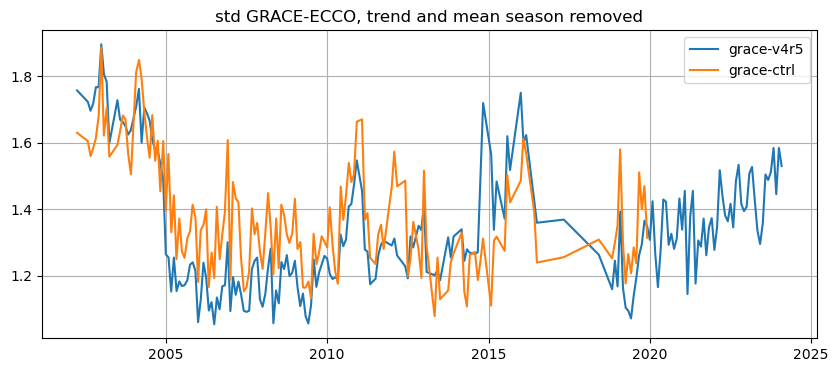

In [105]:
plt.figure(figsize=(10,4))
plt.plot(grace_m_v4r5.time,grace_m_v4r5_rms.pb,label='grace-v4r5')
plt.plot(grace_m_ctrl.time,grace_m_ctrl_rms.pb,label='grace-ctrl')
plt.title('std GRACE-ECCO, trend and mean season removed')
plt.grid()
plt.legend()

#### plot 5.1 and 6.1, 5.2 and 6.2, 5.3 and 6.3 at the same plot

5.	rms of ECCOv4r5 and ECCOctrl and (ECCOv4r5-ECCOctrl) on time steps where GRACE data are NOT available<br>
    5.1 nothing removed<br>
    5.2 trends removed<br>
    5.3 trends and mean season removed<br>



In [ ]:
grace_m_v4r5 = aligned_grace - aligned_ecco

[grace, ctrl, grace_m_ctrl] = Utils.get_aligned_data(aligned_grace, ecco_ctrl)


# First get both sets of ECCO data that do NOT align with GRACE times
v4r5 = ECCO_time_sets.get_other_times(all_ecco)  # default is for get_other_times() to compare times with GRACE
ctrl = ECCO_time_sets.get_other_times(ecco_ctrl)
diff = v4r5 - ctrl

fig0 = RMS.rms_multi_time_plots([v4r5, ctrl, diff], \
                         weight, \
                         ['v4r5', 'ctrl', 'v4r5-ctrl'], \
                         ['RMS of ECCO V4R5, CTRL and V4R5 - CTRL, at NOT GRACE times'])

v4r5_detrended = Filter.detrend(v4r5)
ctrl_detrended = Filter.detrend(ctrl)
diff_detrended = Filter.detrend(v4r5-ctrl)

fig01 = RMS.rms_multi_time_plots([v4r5_detrended, ctrl_detrended, diff_detrended], \
                         weight, \
                         ['v4r5', 'ctrl', 'v4r5-ctrl'], \
                         ['RMS of ECCO V4R5, CTRL and V4R5 - CTRL, Detrended, at NOT GRACE times'])

v4r5_detrended_msc = Filter.remove_msc(v4r5_detrended)
ctrl_detrended_msc = Filter.remove_msc(ctrl_detrended)
diff_detrended_msc = Filter.remove_msc(diff_detrended)

fig02 = RMS.rms_multi_time_plots([v4r5_detrended_msc, ctrl_detrended_msc, diff_detrended_msc], \
                         weight, \
                         ['v4r5', 'ctrl', 'v4r5-ctrl'], \
                         ['RMS of ECCO V4R5, CTRL and V4R5 - CTRL,, Detrended and MSC Removed, at NOT GRACE times'])

Plots.save_figures_to_pdf([fig0, fig01, fig02], 'rms_ecco_v4r5_ctrl_3_sets_of_3')

6.	rms of ECCOv4r5 and ECCOctrl and (ECCOv4r5-ECCOctrl) on time steps where GRACE data are available<br>
    6.1 nothing removed<br>
    6.2 trends removed<br>
    6.3 trends and mean season removed<br>
[maybe make 5.1 and 6.1 in the same plot; 5.2 and 6.2; 5.3 and 6.3]


2025-01-09 08:47:44 Getting mean season cycle for each data point...
2025-01-09 08:47:53 Done getting mean season cycle for each data point.
2025-01-09 08:47:53 Getting mean season cycle for each data point...
2025-01-09 08:48:02 Done getting mean season cycle for each data point.
2025-01-09 08:48:02 Getting mean season cycle for each data point...
2025-01-09 08:48:11 Done getting mean season cycle for each data point.


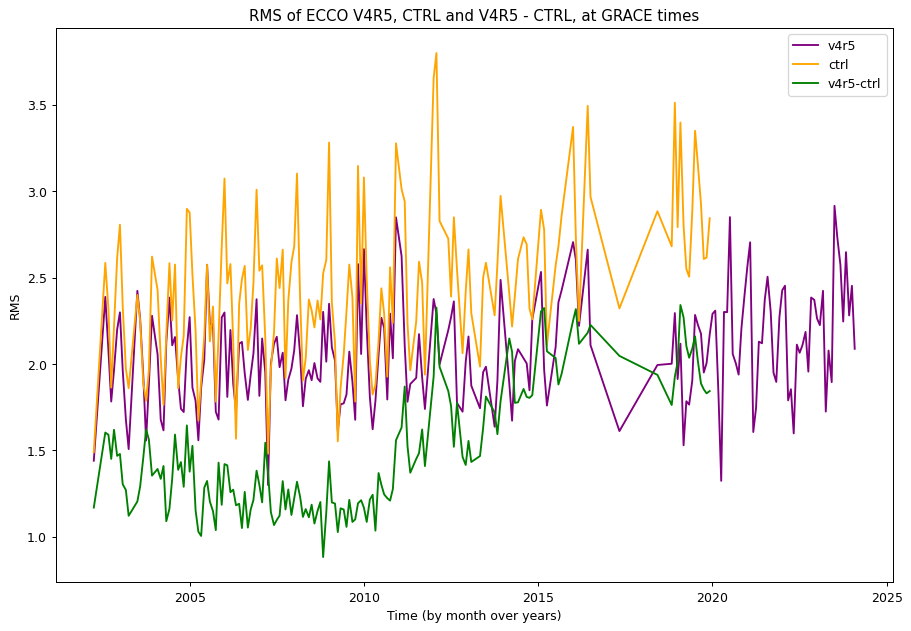

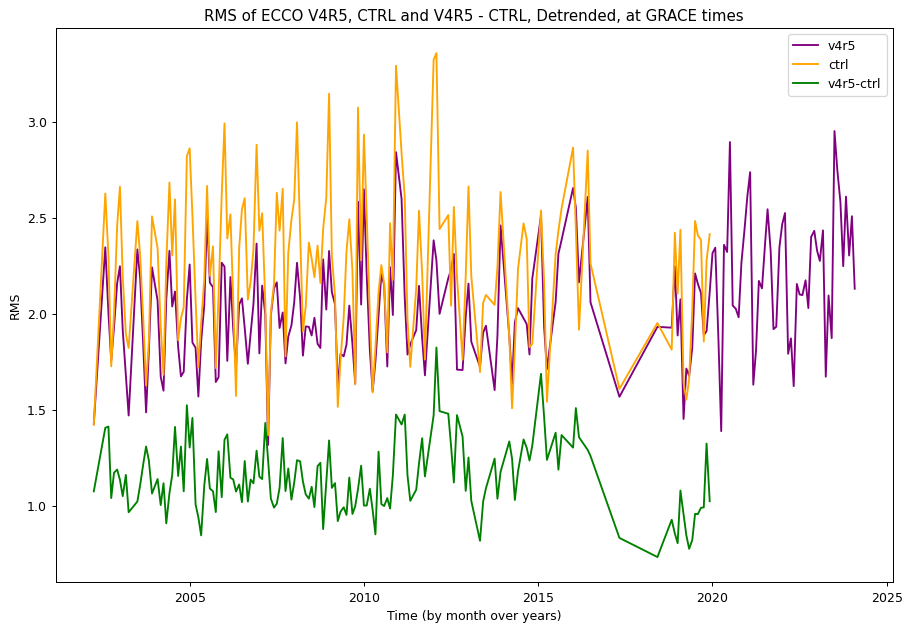

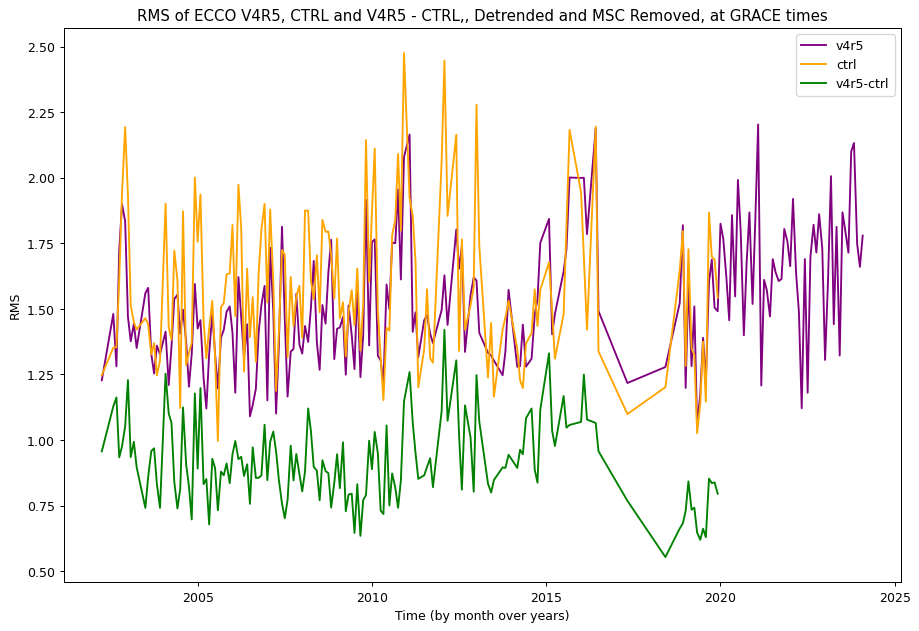

In [4]:
reload(Filter)

# First get both sets of ECCO data that align with GRACE times
[v4r5, grace, diff] = Utils.get_aligned_data(all_ecco, aligned_grace)
del grace, diff
[ctrl, grace, diff] = Utils.get_aligned_data(ecco_ctrl, aligned_grace)
del grace, diff

diff = v4r5 - ctrl


fig0 = RMS.rms_multi_time_plots([v4r5, ctrl, diff], \
                         weight, \
                         ['v4r5', 'ctrl', 'v4r5-ctrl'], \
                         ['RMS of ECCO V4R5, CTRL and V4R5 - CTRL, at GRACE times'])

v4r5_detrended = Filter.detrend(v4r5)
ctrl_detrended = Filter.detrend(ctrl)
diff_detrended = Filter.detrend(v4r5-ctrl)

fig01 = RMS.rms_multi_time_plots([v4r5_detrended, ctrl_detrended, diff_detrended], \
                         weight, \
                         ['v4r5', 'ctrl', 'v4r5-ctrl'], \
                         ['RMS of ECCO V4R5, CTRL and V4R5 - CTRL, Detrended, at GRACE times'])

v4r5_detrended_msc = Filter.remove_msc(v4r5_detrended)
ctrl_detrended_msc = Filter.remove_msc(ctrl_detrended)
diff_detrended_msc = Filter.remove_msc(diff_detrended)

fig02 = RMS.rms_multi_time_plots([v4r5_detrended_msc, ctrl_detrended_msc, diff_detrended_msc], \
                         weight, \
                         ['v4r5', 'ctrl', 'v4r5-ctrl'], \
                         ['RMS of ECCO V4R5, CTRL and V4R5 - CTRL,, Detrended and MSC Removed, at GRACE times'])

# Plots.save_figures_to_pdf([fig0, fig01, fig02], 'rms_ecco_v4r5_ctrl_3_sets_of_3')

5.1 and 6.1

In [128]:
# First get both sets of ECCO data that do NOT align with GRACE times
v4r5 = ECCO_time_sets.get_other_times(all_ecco)  # default is for get_other_times() to compare times with GRACE
ctrl = ECCO_time_sets.get_other_times(ecco_ctrl)
diff = v4r5 - ctrl

rms_v4r5_no_grace = RMS.rms_time(v4r5, 'ecco', weight)
rms_ctrl_no_grace = RMS.rms_time(ctrl, 'ecco', weight)
rms_diff_no_grace = RMS.rms_time(diff, 'ecco', weight)


# First get both sets of ECCO data that align with GRACE times
[v4r5, grace, diff] = Utils.get_aligned_data(all_ecco, aligned_grace)
del grace, diff
[ctrl, grace, diff] = Utils.get_aligned_data(ecco_ctrl, aligned_grace)
del grace, diff
[v4r5, ctrl, diff] = Utils.get_aligned_data(v4r5, ctrl)
diff = v4r5 - ctrl
rms_v4r5_with_grace = RMS.rms_time(v4r5, 'ecco', weight)
rms_ctrl_with_grace = RMS.rms_time(ctrl, 'ecco', weight)
rms_diff_with_grace = RMS.rms_time(diff, 'ecco', weight)


In [12]:
import numpy as np

In [129]:
# there are rounding errors which prevents us from finding common elements in time and time_with_grace
# regenerate the time_with_grace
time_with_grace = np.round(rms_diff_with_grace.time.data,2)
months = (np.round(np.modf(rms_diff_with_grace.time.data)[0]*12)).astype(np.int64)
time_with_grace = np.round(np.modf(rms_diff_with_grace.time.data)[1]+(months)/12,2)
# indices in time in which GRACE have data
common = np.intersect1d(time,time_with_grace,return_indices=True) #[0]: values, [1]:index of first, [2]: index of second
data4plot[common[1]] = rms_diff_with_grace.pb.data

In [130]:
# there are rounding errors which prevents us from finding common elements in time and time_with_grace
# regenerate the time_no_grace
time_no_grace = np.round(rms_diff_no_grace.time.data,2)
months = (np.round(np.modf(rms_diff_no_grace.time.data)[0]*12)).astype(np.int64)
time_no_grace = np.round(np.modf(rms_diff_no_grace.time.data)[1]+(months)/12,2)
# indices in time in which GRACE have no data
common = np.intersect1d(time,time_no_grace,return_indices=True) #[0]: values, [1]:index of first, [2]: index of second
data4plot[common[1]] = rms_diff_no_grace.pb.data

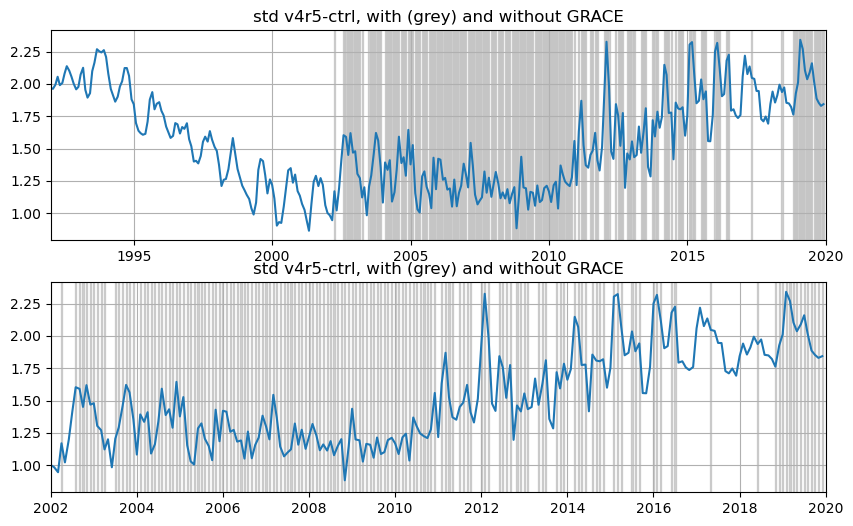

In [131]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(time,data4plot)
# Mark certain x-axis values grey
grey_values = time_with_grace
for value in grey_values:
    plt.axvspan(value - 1/48, value + 1/48, color='grey', alpha=0.3)
plt.title('std v4r5-ctrl, with (grey) and without GRACE')
plt.xlim([1992,2020])
plt.grid()

plt.subplot(212)
plt.plot(time,data4plot)
# Mark certain x-axis values grey
grey_values = time_with_grace
for value in grey_values:
    plt.axvspan(value - 1/80, value + 1/80, color='grey', alpha=0.3)
plt.title('std v4r5-ctrl, with (grey) and without GRACE')
plt.xlim([2002,2020])
plt.grid()


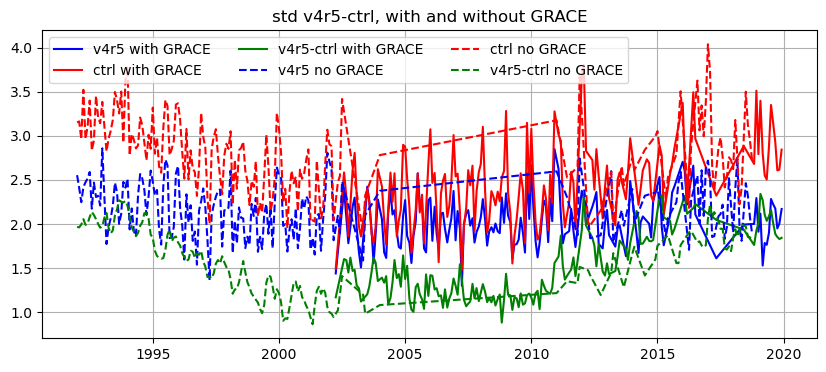

In [119]:
plt.figure(figsize=(10,4))
plt.plot(rms_v4r5_with_grace.time,rms_v4r5_with_grace.pb,label='v4r5 with GRACE',color='b')
plt.plot(rms_v4r5_with_grace.time,rms_ctrl_with_grace.pb,label='ctrl with GRACE',color='r')
plt.plot(rms_v4r5_with_grace.time,rms_diff_with_grace.pb,label='v4r5-ctrl with GRACE',color='g')

plt.plot(rms_v4r5_no_grace.time,rms_v4r5_no_grace.pb,'--',label='v4r5 no GRACE',color='b')
plt.plot(rms_v4r5_no_grace.time,rms_ctrl_no_grace.pb,'--',label='ctrl no GRACE',color='r')
plt.plot(rms_v4r5_no_grace.time,rms_diff_no_grace.pb,'--',label='v4r5-ctrl no GRACE',color='g')

plt.title('std v4r5-ctrl, with and without GRACE')
plt.grid()
plt.legend(ncols=3)

5.2 and 6.2

In [121]:
# First get both sets of ECCO data that do NOT align with GRACE times
v4r5 = ECCO_time_sets.get_other_times(all_ecco)  # default is for get_other_times() to compare times with GRACE
v4r5 = Filter.detrend(v4r5)

ctrl = ECCO_time_sets.get_other_times(ecco_ctrl)
ctrl = Filter.detrend(ctrl)
diff = v4r5 - ctrl

rms_v4r5_no_grace = RMS.rms_time(v4r5, 'ecco', weight)
rms_ctrl_no_grace = RMS.rms_time(ctrl, 'ecco', weight)
rms_diff_no_grace = RMS.rms_time(diff, 'ecco', weight)


# First get both sets of ECCO data that align with GRACE times
[v4r5, grace, diff] = Utils.get_aligned_data(all_ecco, aligned_grace)
del grace, diff
[ctrl, grace, diff] = Utils.get_aligned_data(ecco_ctrl, aligned_grace)
[v4r5, ctrl, diff] = Utils.get_aligned_data(v4r5, ctrl)
v4r5 = Filter.detrend(v4r5)
ctrl = Filter.detrend(ctrl)
diff = v4r5 - ctrl
rms_v4r5_with_grace = RMS.rms_time(v4r5, 'ecco', weight)
rms_ctrl_with_grace = RMS.rms_time(ctrl, 'ecco', weight)
rms_diff_with_grace = RMS.rms_time(diff, 'ecco', weight)


In [122]:
# there are rounding errors which prevents us from finding common elements in time and time_with_grace
# regenerate the time_with_grace
time_with_grace = np.round(rms_diff_with_grace.time.data,2)
months = (np.round(np.modf(rms_diff_with_grace.time.data)[0]*12)).astype(np.int64)
time_with_grace = np.round(np.modf(rms_diff_with_grace.time.data)[1]+(months)/12,2)
# indices in time in which GRACE have data
common = np.intersect1d(time,time_with_grace,return_indices=True) #[0]: values, [1]:index of first, [2]: index of second
data4plot[common[1]] = rms_diff_with_grace.pb.data

In [123]:
# there are rounding errors which prevents us from finding common elements in time and time_with_grace
# regenerate the time_no_grace
time_no_grace = np.round(rms_diff_no_grace.time.data,2)
months = (np.round(np.modf(rms_diff_no_grace.time.data)[0]*12)).astype(np.int64)
time_no_grace = np.round(np.modf(rms_diff_no_grace.time.data)[1]+(months)/12,2)
# indices in time in which GRACE have no data
common = np.intersect1d(time,time_no_grace,return_indices=True) #[0]: values, [1]:index of first, [2]: index of second
data4plot[common[1]] = rms_diff_no_grace.pb.data

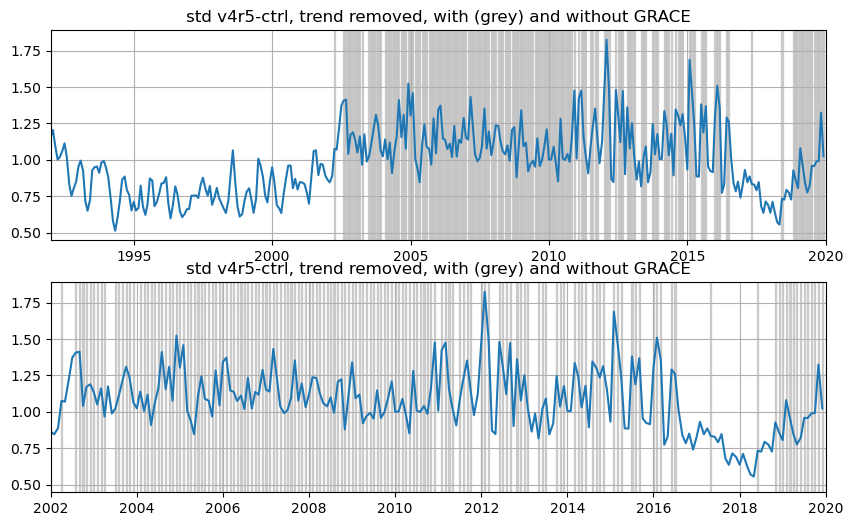

In [124]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(time,data4plot)
# Mark certain x-axis values grey
grey_values = time_with_grace
for value in grey_values:
    plt.axvspan(value - 1/48, value + 1/48, color='grey', alpha=0.3)
plt.title('std v4r5-ctrl, trend removed, with (grey) and without GRACE')
plt.xlim([1992,2020])
plt.grid()

plt.subplot(212)
plt.plot(time,data4plot)
# Mark certain x-axis values grey
grey_values = time_with_grace
for value in grey_values:
    plt.axvspan(value - 1/80, value + 1/80, color='grey', alpha=0.3)
plt.title('std v4r5-ctrl, trend removed, with (grey) and without GRACE')
plt.xlim([2002,2020])
plt.grid()


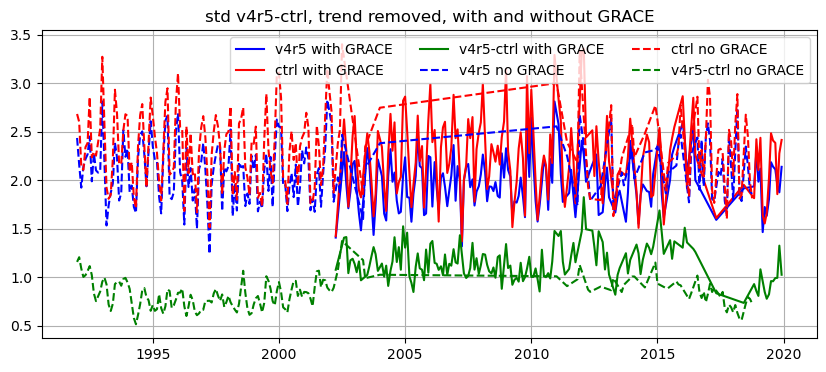

In [121]:
plt.figure(figsize=(10,4))
plt.plot(rms_v4r5_with_grace.time,rms_v4r5_with_grace.pb,label='v4r5 with GRACE',color='b')
plt.plot(rms_v4r5_with_grace.time,rms_ctrl_with_grace.pb,label='ctrl with GRACE',color='r')
plt.plot(rms_v4r5_with_grace.time,rms_diff_with_grace.pb,label='v4r5-ctrl with GRACE',color='g')

plt.plot(rms_v4r5_no_grace.time,rms_v4r5_no_grace.pb,'--',label='v4r5 no GRACE',color='b')
plt.plot(rms_v4r5_no_grace.time,rms_ctrl_no_grace.pb,'--',label='ctrl no GRACE',color='r')
plt.plot(rms_v4r5_no_grace.time,rms_diff_no_grace.pb,'--',label='v4r5-ctrl no GRACE',color='g')

plt.title('std v4r5-ctrl, trend removed, with and without GRACE')
plt.grid()
plt.legend(ncols=3)

5.3 and 6.3

In [117]:
# First get both sets of ECCO data that do NOT align with GRACE times
v4r5 = ECCO_time_sets.get_other_times(all_ecco)  # default is for get_other_times() to compare times with GRACE
v4r5 = Filter.detrend(v4r5)
v4r5 = Filter.remove_msc(v4r5)
ctrl = ECCO_time_sets.get_other_times(ecco_ctrl)
ctrl = Filter.detrend(ctrl)
ctrl = Filter.remove_msc(ctrl)
diff = v4r5 - ctrl

rms_v4r5_no_grace = RMS.rms_time(v4r5, 'ecco', weight)
rms_ctrl_no_grace = RMS.rms_time(ctrl, 'ecco', weight)
rms_diff_no_grace = RMS.rms_time(diff, 'ecco', weight)


# First get both sets of ECCO data that align with GRACE times
[v4r5, grace, diff] = Utils.get_aligned_data(all_ecco, aligned_grace)
del grace, diff
[ctrl, grace, diff] = Utils.get_aligned_data(ecco_ctrl, aligned_grace)
[v4r5, ctrl, diff] = Utils.get_aligned_data(v4r5, ctrl)
v4r5 = Filter.detrend(v4r5)
v4r5 = Filter.remove_msc(v4r5)
ctrl = Filter.detrend(ctrl)
ctrl = Filter.remove_msc(ctrl)
diff = v4r5 - ctrl
rms_v4r5_with_grace = RMS.rms_time(v4r5, 'ecco', weight)
rms_ctrl_with_grace = RMS.rms_time(ctrl, 'ecco', weight)
rms_diff_with_grace = RMS.rms_time(diff, 'ecco', weight)


2025-01-09 09:40:40 Getting mean season cycle for each data point...
2025-01-09 09:40:48 Done getting mean season cycle for each data point.
2025-01-09 09:40:55 Getting mean season cycle for each data point...
2025-01-09 09:41:04 Done getting mean season cycle for each data point.
2025-01-09 09:41:13 Getting mean season cycle for each data point...
2025-01-09 09:41:21 Done getting mean season cycle for each data point.
2025-01-09 09:41:28 Getting mean season cycle for each data point...
2025-01-09 09:41:37 Done getting mean season cycle for each data point.


In [118]:
# there are rounding errors which prevents us from finding common elements in time and time_with_grace
# regenerate the time_with_grace
time_with_grace = np.round(rms_diff_with_grace.time.data,2)
months = (np.round(np.modf(rms_diff_with_grace.time.data)[0]*12)).astype(np.int64)
time_with_grace = np.round(np.modf(rms_diff_with_grace.time.data)[1]+(months)/12,2)
# indices in time in which GRACE have data
common = np.intersect1d(time,time_with_grace,return_indices=True) #[0]: values, [1]:index of first, [2]: index of second
data4plot[common[1]] = rms_diff_with_grace.pb.data

In [119]:
# there are rounding errors which prevents us from finding common elements in time and time_with_grace
# regenerate the time_no_grace
time_no_grace = np.round(rms_diff_no_grace.time.data,2)
months = (np.round(np.modf(rms_diff_no_grace.time.data)[0]*12)).astype(np.int64)
time_no_grace = np.round(np.modf(rms_diff_no_grace.time.data)[1]+(months)/12,2)
# indices in time in which GRACE have no data
common = np.intersect1d(time,time_no_grace,return_indices=True) #[0]: values, [1]:index of first, [2]: index of second
data4plot[common[1]] = rms_diff_no_grace.pb.data

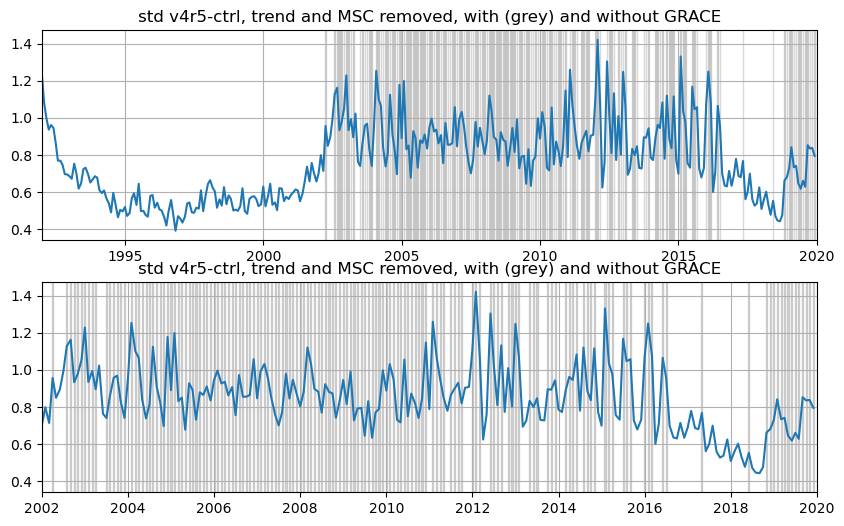

In [120]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(time,data4plot)
# Mark certain x-axis values grey
grey_values = time_with_grace
for value in grey_values:
    plt.axvspan(value - 1/80, value + 1/80, color='grey', alpha=0.3)
plt.title('std v4r5-ctrl, trend and MSC removed, with (grey) and without GRACE')
plt.xlim([1992,2020])
plt.grid()

plt.subplot(212)
plt.plot(time,data4plot)
# Mark certain x-axis values grey
grey_values = time_with_grace
for value in grey_values:
    plt.axvspan(value - 1/80, value + 1/80, color='grey', alpha=0.3)
plt.title('std v4r5-ctrl, trend and MSC removed, with (grey) and without GRACE')
plt.xlim([2002,2020])
plt.grid()


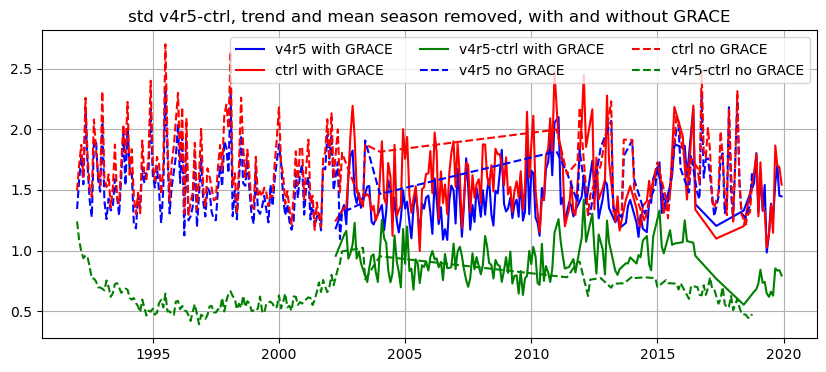

In [124]:
plt.figure(figsize=(10,4))
plt.plot(rms_v4r5_with_grace.time,rms_v4r5_with_grace.pb,label='v4r5 with GRACE',color='b')
plt.plot(rms_v4r5_with_grace.time,rms_ctrl_with_grace.pb,label='ctrl with GRACE',color='r')
plt.plot(rms_v4r5_with_grace.time,rms_diff_with_grace.pb,label='v4r5-ctrl with GRACE',color='g')

plt.plot(rms_v4r5_no_grace.time,rms_v4r5_no_grace.pb,'--',label='v4r5 no GRACE',color='b')
plt.plot(rms_v4r5_no_grace.time,rms_ctrl_no_grace.pb,'--',label='ctrl no GRACE',color='r')
plt.plot(rms_v4r5_no_grace.time,rms_diff_no_grace.pb,'--',label='v4r5-ctrl no GRACE',color='g')

plt.title('std v4r5-ctrl, trend and mean season removed, with and without GRACE')
plt.grid()
plt.legend(ncols=3)